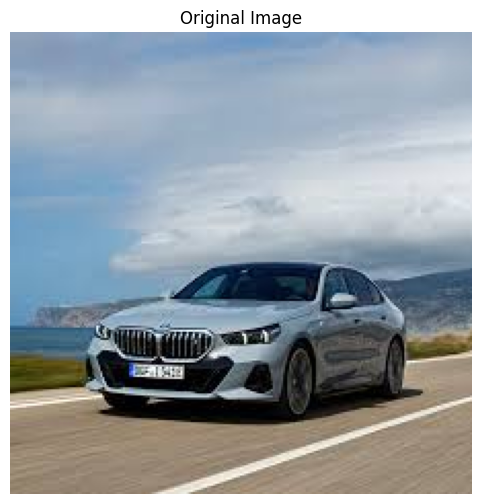

Image Size: Width = 225, Height = 225, Channels = 3
Total Number of Pixels: 50625


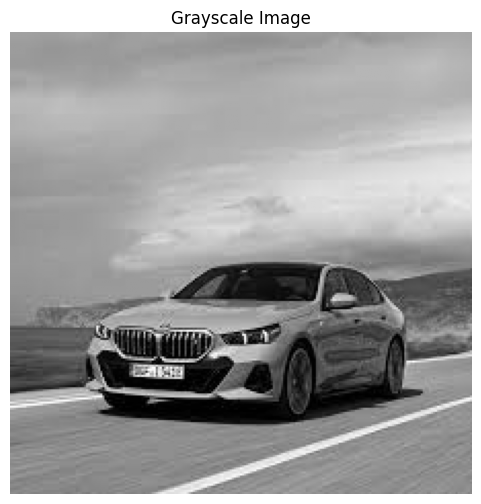

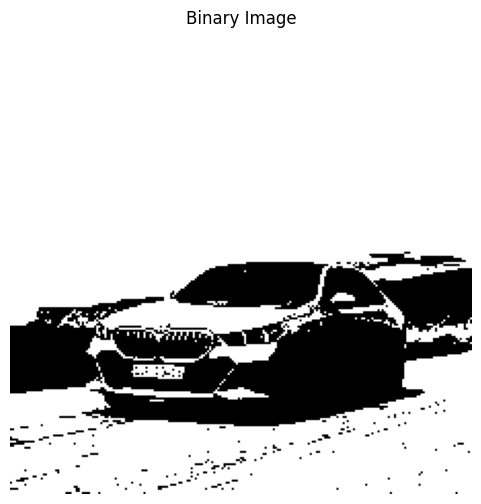

Number of Black Pixels: 11236
All images saved successfully.


In [ ]:
#E22CSEU0164 PRATHAM PAHWA




import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/download.jpeg")

if image is None:
    raise ValueError("Image not loaded. Check the file path.")

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

height, width, channels = image.shape
print(f"Image Size: Width = {width}, Height = {height}, Channels = {channels}")

total_pixels = height * width
print(f"Total Number of Pixels: {total_pixels}")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)

plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

threshold_value = 128
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

plt.figure(figsize=(6, 6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis('off')
plt.show()

black_pixel_count = np.sum(binary_image == 0)
print(f"Number of Black Pixels: {black_pixel_count}")

cv2.imwrite("rgb_image.jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite("gray_image.jpg", gray_image)
cv2.imwrite("binary_image.jpg", binary_image)

print("All images saved successfully.")

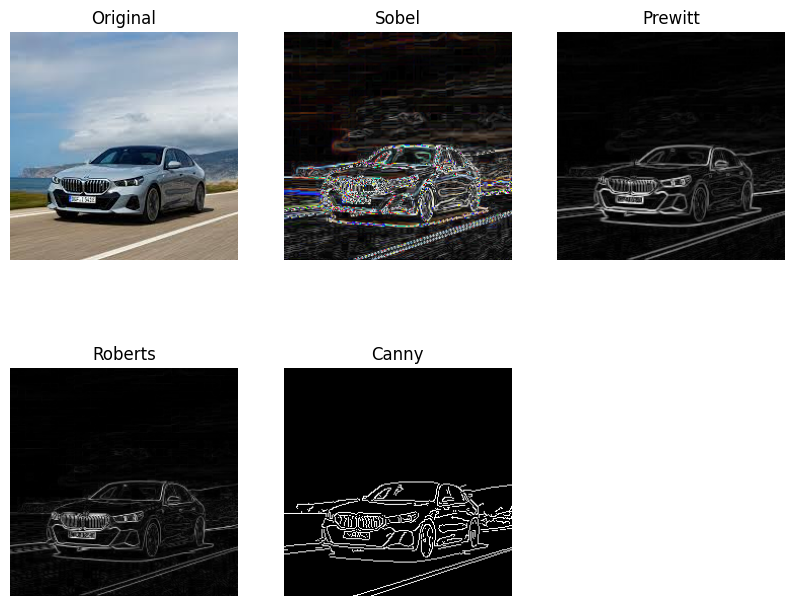

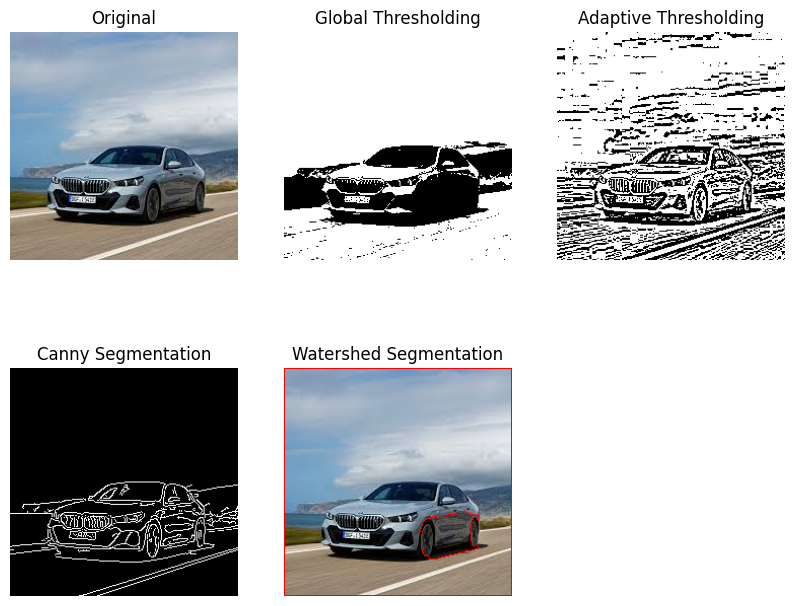

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts

image = cv2.imread("/content/download.jpeg")
if image is None:
    raise ValueError("Image not found. Check the file path.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = cv2.Sobel(image_rgb, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_rgb, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y).astype(np.uint8)

prewitt_edges = prewitt(image_gray)
roberts_edges = roberts(image_gray)
canny_edges = cv2.Canny(image_gray, 100, 200)

plt.figure(figsize=(10, 8))
titles = ["Original", "Sobel", "Prewitt", "Roberts", "Canny"]
images = [image_rgb, sobel, prewitt_edges, roberts_edges, canny_edges]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray" if i > 0 else None)
    plt.title(titles[i])
    plt.axis("off")

plt.show()

_, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
canny_segment = cv2.Canny(image_gray, 100, 200)

image_color = image_rgb.copy()
_, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]

plt.figure(figsize=(10, 8))
titles = ["Original", "Global Thresholding", "Adaptive Thresholding", "Canny Segmentation", "Watershed Segmentation"]
images = [image_rgb, global_thresh, adaptive_thresh, canny_segment, image_color]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray" if i < 4 else None)
    plt.title(titles[i])
    plt.axis("off")

plt.show()
